In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import quandl

from datetime import date, datetime, time, timezone


In [2]:
def get_stock_data(ticker, start, end):
    data = web.DataReader(ticker, 'stooq',start,end)
    data.insert(0, 'ticker', ticker)#agrega la columan ticker
    return data

ticker = 'DIS'
start = datetime(2020,1,1)
end = datetime.today()

d = get_stock_data(ticker,start,end)
d.head()

,ticker,Open,High,Low,Close,Volume
Date,,,,,,
2024-11-15,DIS,110.250,115.19,110.25,115.08,32048032
2024-11-14,DIS,110.330,114.81,108.40,109.12,47436052
2024-11-13,DIS,100.785,103.20,100.35,102.72,17701277
2024-11-12,DIS,100.675,101.29,99.50,100.99,9366216
2024-11-11,DIS,99.000,100.90,99.00,100.86,9137854


In [3]:
#Está fue la función hecha por la profe en clases 
def get_stock(ticker, start, end): #definimos una función que nos ayudará a buscar la informacion
    data = web.get_data_stooq(ticker, start, end)
    data.insert(0, "Ticker", ticker)#agrega la columan ticker
    return data


In [4]:
#definimos las fechas de inicio y final para las tablas
ini = date(2020,1,1)
fin = date.today()

SPY = get_stock("SPY", ini, fin)
IYW = get_stock("IYW", ini, fin)
VT  = get_stock("VT",  ini, fin)
DBA = get_stock("DBA", ini, fin)
TLT = get_stock("TLT", ini, fin)
PDBC= get_stock("PDBC",ini, fin)
IAU = get_stock("IAU", ini, fin)

SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1228 entries, 2024-11-15 to 2020-01-02
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  1228 non-null   object 
 1   Open    1228 non-null   float64
 2   High    1228 non-null   float64
 3   Low     1228 non-null   float64
 4   Close   1228 non-null   float64
 5   Volume  1228 non-null   float64
dtypes: float64(5), object(1)
memory usage: 67.2+ KB


In [5]:
SPY.head()

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2024-11-15,SPY,589.72,590.20,583.86,585.75,75988766.0
2024-11-14,SPY,597.32,597.81,592.65,593.35,38904109.0
2024-11-13,SPY,597.37,599.23,594.96,597.19,47388640.0
2024-11-12,SPY,598.68,599.29,594.37,596.90,43006128.0
2024-11-11,SPY,599.81,600.17,597.00,598.76,37586773.0


In [6]:
#pivotear todos los datos
SPY = SPY.pivot(columns = 'Ticker', values = 'Close')
IYW = IYW.pivot(columns = 'Ticker', values = 'Close')
VT  = VT.pivot(columns = 'Ticker', values = 'Close')
DBA = DBA.pivot(columns = 'Ticker', values = 'Close')
TLT = TLT.pivot(columns = 'Ticker', values = 'Close')
PDBC= PDBC.pivot(columns = 'Ticker', values = 'Close')
IAU = IAU.pivot(columns = 'Ticker', values = 'Close')

In [ ]:
#generamos una tabla con todos los datos de cierre
stock = pd.concat([SPY, IYW, VT, DBA, TLT, PDBC, IAU],
                  axis=1,
                  join='outer')
stock.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,311.097,58.5205,77.0139,16.50,134.123,9.53455,29.22
2020-01-03,308.737,57.9349,76.3184,16.31,136.194,9.61388,29.62
2020-01-06,309.907,58.2920,76.5998,16.35,135.418,9.62622,29.92
2020-01-07,309.044,58.3140,76.3644,16.39,134.751,9.60859,30.04
2020-01-08,310.681,58.8967,76.6755,16.31,133.855,9.47725,29.82


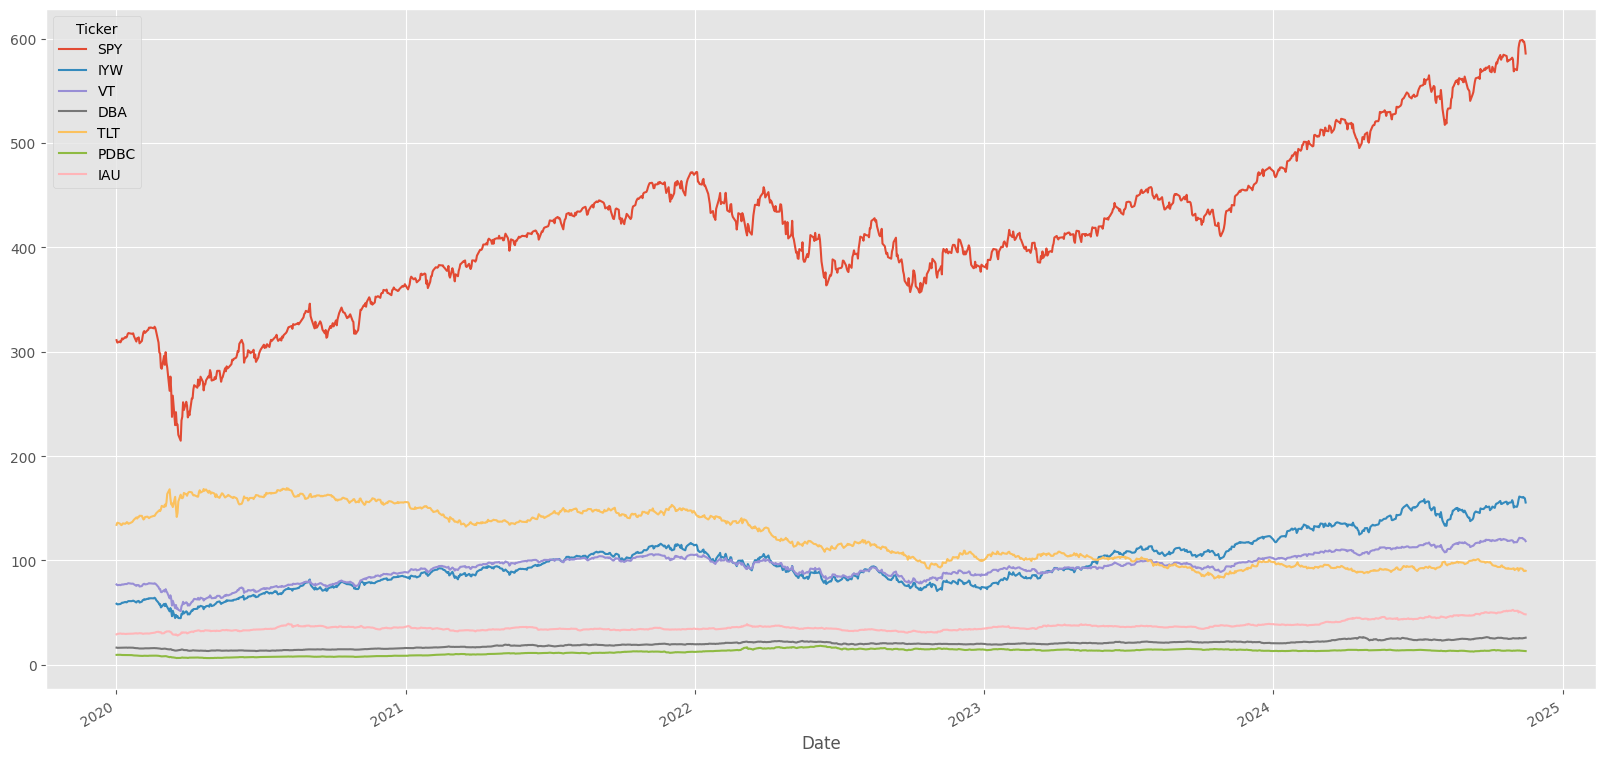

In [8]:
#Esto para poder plotear la gráfica
plt.style.use('ggplot')#estilo de grafico
stock.plot(figsize=(20,10))
plt.show()

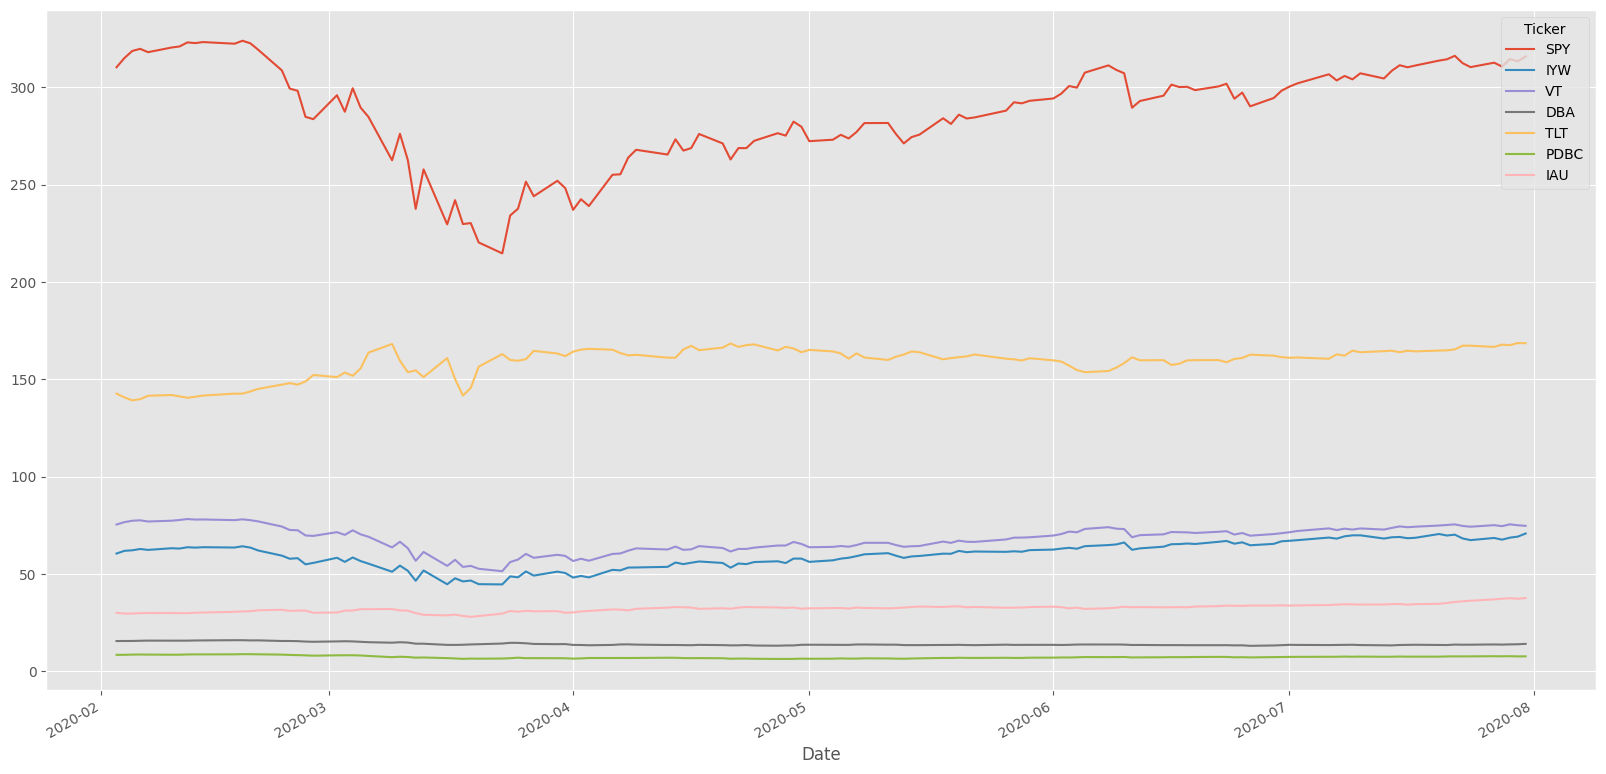

In [9]:
#Comparemos que sucedió en la época del Covid
covid = stock['2020-2-1': '2020-7-31'] #contiene datos de stock de fechas como indices

#Haremos otro mapa con el covid
plt.style.use('ggplot')
covid.plot(figsize = (20,10))
plt.show()

In [10]:
x = covid.index

s_y = covid[['SPY']]
i_y = covid[['IAU']]
d_y = covid[['DBA']]
t_y = covid[['TLT']]


Text(0.5, 0.98, 'Covid 19')

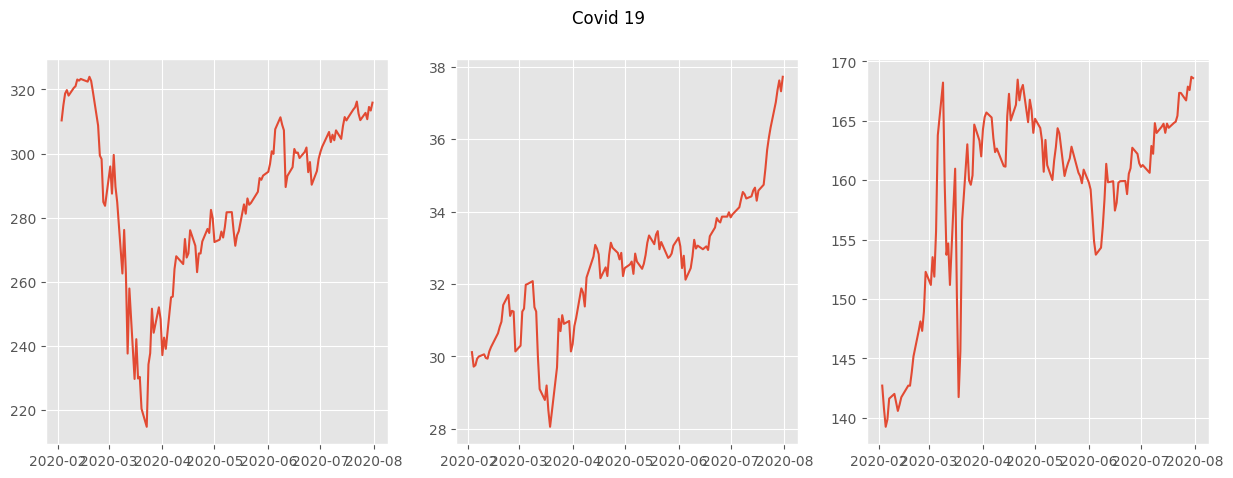

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3, figsize = (15,5))
axs[0].plot(x, s_y)
axs[1].plot(x, i_y)
axs[2].plot(x, t_y)

fig.suptitle('Covid 19')

In [12]:
#Ahora lo haremos con un grafico de barras
ini = datetime(2020,1,1)
fin = datetime.today()

PDBC = get_stock('PDBC', ini, fin)
PDBC.head()
#PDBC_pivot = PDBC.pivot(columns='Ticker', values='Close')
#PDBC_pivot.head()


,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2024-11-15,PDBC,13.270,13.3350,13.1700,13.18,2213824.0
2024-11-14,PDBC,13.350,13.3600,13.2200,13.24,2532567.0
2024-11-13,PDBC,13.245,13.3274,13.1630,13.26,3910246.0
2024-11-12,PDBC,13.420,13.4500,13.3000,13.30,2290454.0
2024-11-11,PDBC,13.410,13.4300,13.3312,13.38,2739500.0


In [13]:
#borrar todo menos la ultima columna
#PDBC.drop(['Ticker', 'Open', 'High', 'Low', 'Close'], axis = 1, inplace = True)

PDBC.head()

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2024-11-15,PDBC,13.270,13.3350,13.1700,13.18,2213824.0
2024-11-14,PDBC,13.350,13.3600,13.2200,13.24,2532567.0
2024-11-13,PDBC,13.245,13.3274,13.1630,13.26,3910246.0
2024-11-12,PDBC,13.420,13.4500,13.3000,13.30,2290454.0
2024-11-11,PDBC,13.410,13.4300,13.3312,13.38,2739500.0


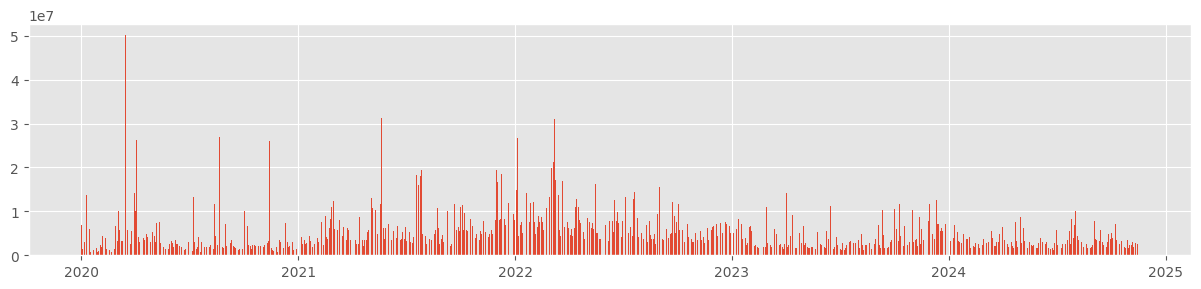

In [14]:
x = PDBC.index
y = PDBC['Volume']
plt.figure(figsize=(15,3))
plt.bar(x,y)
plt.show()

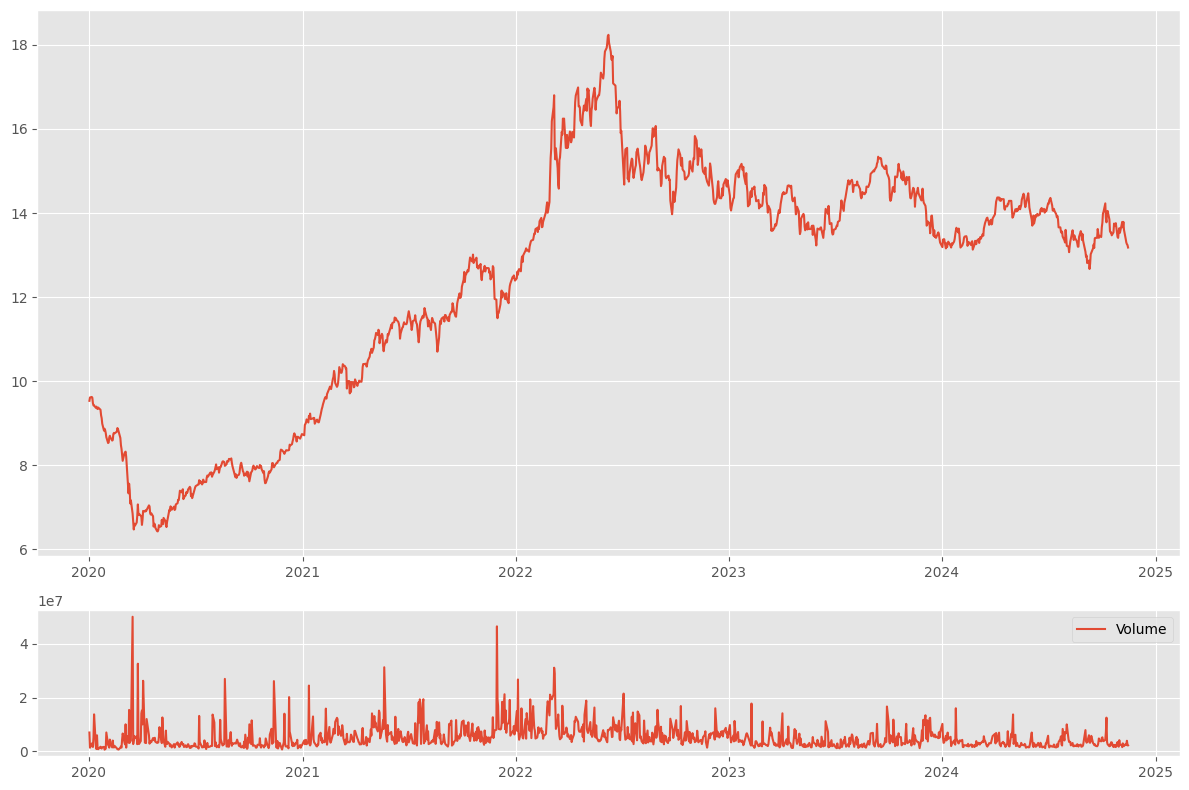

In [61]:
fig = plt.figure(figsize=(12,8))

top_grid = plt.subplot2grid((4,4),(0,0),rowspan=3,colspan=4)#rejilla superior (4,4 cantidad de columnas y filas)
bottom_grid = plt.subplot2grid((4,4),(3,0), rowspan=1,colspan=4)#rejilla inferior

top_grid.plot(PDBC.index, PDBC['Close'], label = 'Close')
bottom_grid.plot(PDBC.index, PDBC['Volume'], label = 'Volume')

plt.tight_layout()

plt.legend()
plt.show()

In [62]:
stock.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,311.097,58.5205,77.0139,16.50,134.123,9.53455,29.22
2020-01-03,308.737,57.9349,76.3184,16.31,136.194,9.61388,29.62
2020-01-06,309.907,58.2920,76.5998,16.35,135.418,9.62622,29.92
2020-01-07,309.044,58.3140,76.3644,16.39,134.751,9.60859,30.04
2020-01-08,310.681,58.8967,76.6755,16.31,133.855,9.47725,29.82


In [ ]:
stock['SPY'].shift(1) #desplazar la columna para obtener el precio dia anterior

Date
2020-01-02        NaN
2020-01-03    311.097
2020-01-06    308.737
2020-01-07    309.907
2020-01-08    309.044
               ...   
2024-11-11    598.190
2024-11-12    598.760
2024-11-13    596.900
2024-11-14    597.190
2024-11-15    593.350
Name: SPY, Length: 1228, dtype: float64

In [67]:
#calcular el precio de cierre
spy_daily_pc = (stock['SPY']/stock['SPY'].shift(1)-1)*100

spy_daily_pc 

Date
2020-01-02         NaN
2020-01-03   -0.758606
2020-01-06    0.378963
2020-01-07   -0.278471
2020-01-08    0.529698
                ...   
2024-11-11    0.095287
2024-11-12   -0.310642
2024-11-13    0.048584
2024-11-14   -0.643011
2024-11-15   -1.280863
Name: SPY, Length: 1228, dtype: float64

<Axes: xlabel='Date'>

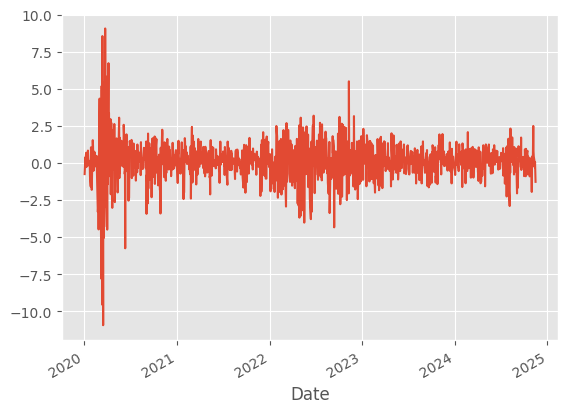

In [68]:
spy_daily_pc.plot()

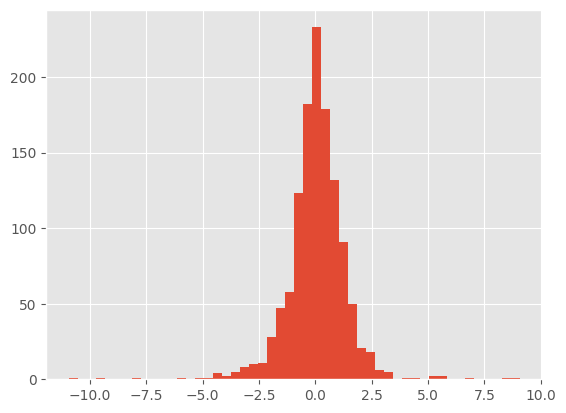

In [ ]:
spy_daily_pc.iloc[0] = 0

plt.hist(spy_daily_pc, bins = 50) #está diviendo la cotización diaria en 50 tramos
plt.show()

In [ ]:
#Ahora con todas las monedas, calcula las variaciones diarias de cada moneda
stock_daily_pc = (stock - stock.shift(1))/stock.shift(1) * 100
stock_daily_pc.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.758606,-1.000675,-0.903084,-1.151515,1.544105,0.832027,1.368925
2020-01-06,0.378963,0.616381,0.368718,0.245248,-0.569775,0.128356,1.012829
2020-01-07,-0.278471,0.037741,-0.307312,0.244648,-0.492549,-0.183146,0.401070
2020-01-08,0.529698,0.999245,0.407389,-0.488103,-0.664930,-1.366902,-0.732357


In [74]:
# obtener la formula de la rentabilidad
stock_d_cr = stock_daily_pc.cumsum()#suma los valores de una serie o lista
stock_d_cr

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.758606,-1.000675,-0.903084,-1.151515,1.544105,0.832027,1.368925
2020-01-06,-0.379643,-0.384293,-0.534365,-0.906267,0.974330,0.960383,2.381755
2020-01-07,-0.658113,-0.346552,-0.841677,-0.661619,0.481781,0.777237,2.782824
2020-01-08,-0.128415,0.652693,-0.434288,-1.149721,-0.183150,-0.589665,2.050467
...,...,...,...,...,...,...,...
2024-11-11,76.462710,121.199668,55.881459,48.429112,-29.752601,43.787012,58.563524
2024-11-12,76.152068,121.561557,55.083433,49.256536,-31.251950,43.189105,57.695012
2024-11-13,76.200653,121.076633,54.876102,49.569158,-32.200549,42.888353,56.696642


<Axes: xlabel='Date'>

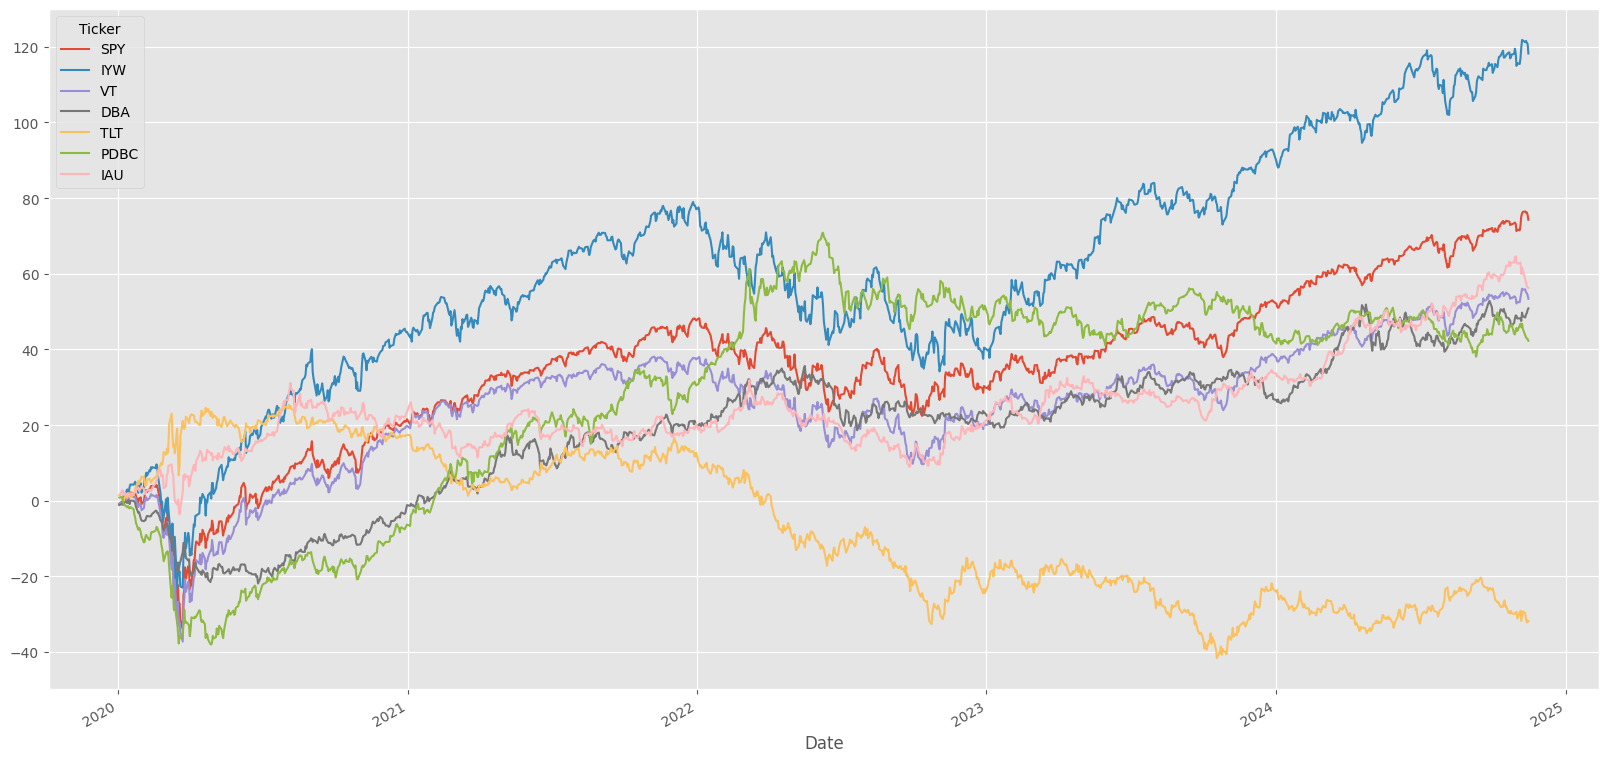

In [75]:
stock_d_cr.plot(figsize=(20,10))

In [76]:
df_corr = stock_daily_pc.corr()#analiza la fuerza de asociacion de los datos. Cuanto más cerca de 1 más fuerte la relación
df_corr

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Ticker,,,,,,,
SPY,1.000000,0.917088,0.976032,0.211119,-0.155732,0.321649,0.153758
IYW,0.917088,1.000000,0.882381,0.173514,-0.093553,0.234362,0.154887
VT,0.976032,0.882381,1.000000,0.238002,-0.144013,0.358628,0.203609
DBA,0.211119,0.173514,0.238002,1.000000,-0.117865,0.488465,0.162447
TLT,-0.155732,-0.093553,-0.144013,-0.117865,1.000000,-0.146635,0.273691
PDBC,0.321649,0.234362,0.358628,0.488465,-0.146635,1.000000,0.297530
IAU,0.153758,0.154887,0.203609,0.162447,0.273691,0.297530,1.000000


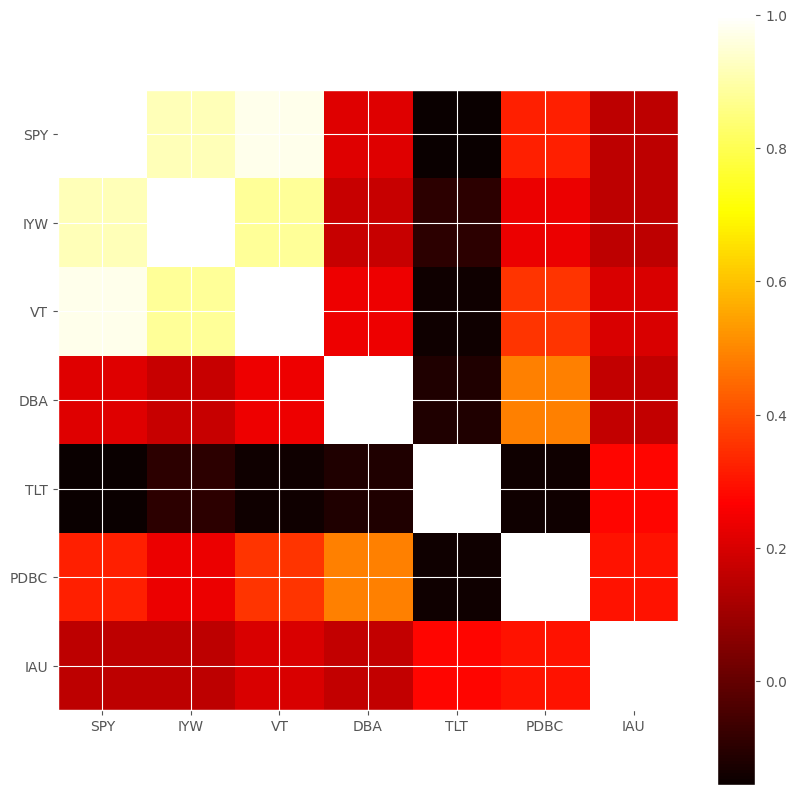

In [80]:
#esto nos puede ayudar a hacer un mapa de calor 
plt.imshow(df_corr, cmap='hot')
plt.colorbar()
plt.xticks(range(len(df_corr)), df_corr.columns)
plt.yticks(range(len(df_corr)), df_corr.columns)

plt.gcf().set_size_inches(10,10)

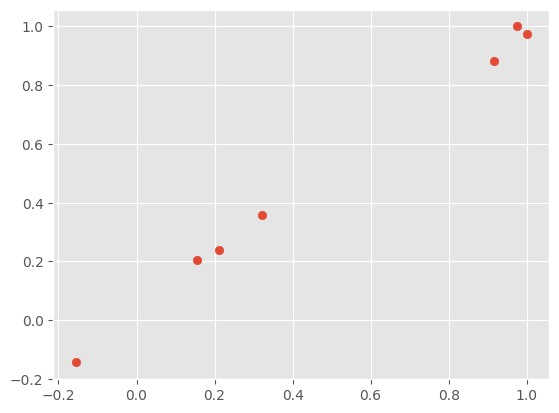

In [ ]:
plt.scatter(df_corr.SPY,df_corr.VT)#podemos ver una grafica scatter
plt.show()